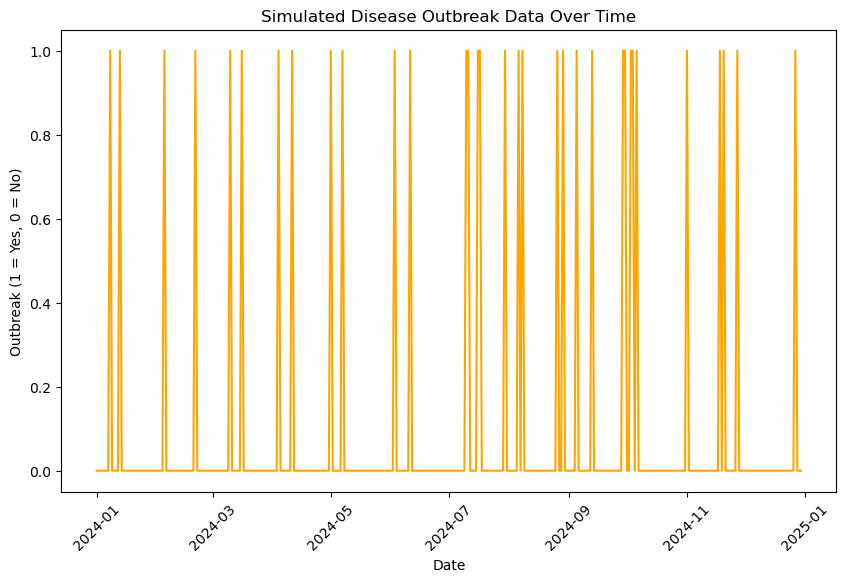

Accuracy: 0.9818181818181818
Confusion Matrix:
[[99  0]
 [ 2  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.82      0.90        11

    accuracy                           0.98       110
   macro avg       0.99      0.91      0.95       110
weighted avg       0.98      0.98      0.98       110



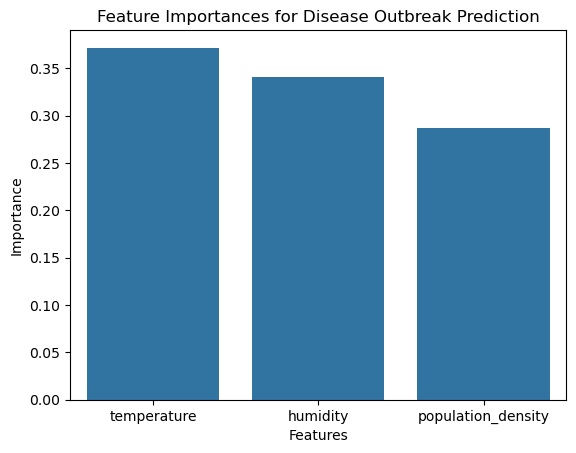

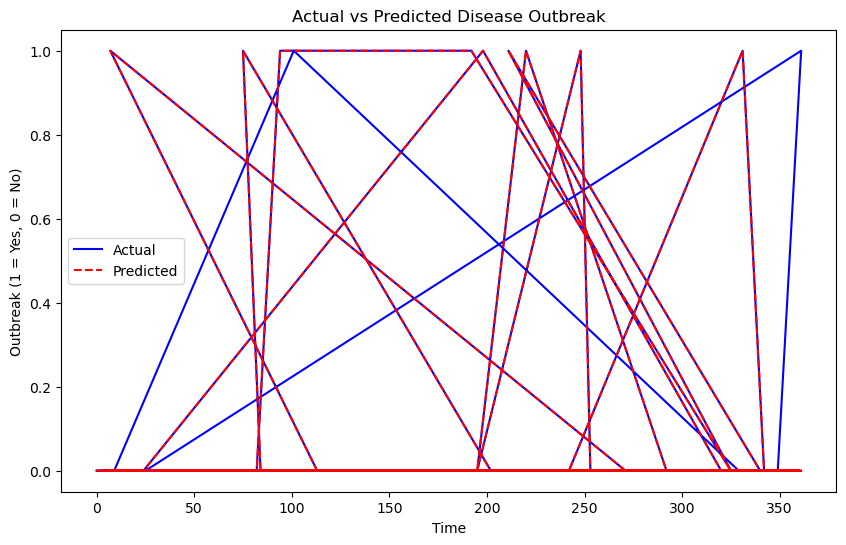

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Generate synthetic data (simulating the dataset)
np.random.seed(42)

# Simulating data for 365 days (1 year)
dates = pd.date_range('2024-01-01', periods=365, freq='D')

# Random data for features (temperature, humidity, population_density)
temperature = np.random.uniform(10, 35, size=365)  # Temperature between 10 and 35 degrees Celsius
humidity = np.random.uniform(30, 90, size=365)     # Humidity between 30% and 90%
population_density = np.random.uniform(100, 1000, size=365)  # Population density between 100 and 1000 people/km²

# Simulating outbreak data: outbreaks will occur based on temperature, humidity, and population density
# Random cases, outbreak occurs if cases exceed 1000, we simulate this based on environmental factors
outbreak = (temperature > 25) & (humidity < 50) & (population_density > 500)  # Example condition for outbreaks
outbreak = outbreak.astype(int)  # 1 = Outbreak, 0 = No Outbreak

# Creating the DataFrame
data = pd.DataFrame({
    'date': dates,
    'temperature': temperature,
    'humidity': humidity,
    'population_density': population_density,
    'outbreak': outbreak
})

# Step 2: Visualizing the data (optional)
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['outbreak'], label='Outbreak (1 = Yes, 0 = No)', color='orange')
plt.title("Simulated Disease Outbreak Data Over Time")
plt.xlabel("Date")
plt.ylabel("Outbreak (1 = Yes, 0 = No)")
plt.xticks(rotation=45)
plt.show()

# Step 3: Prepare the data for machine learning
features = ['temperature', 'humidity', 'population_density']
X = data[features]  # Feature matrix
y = data['outbreak']  # Target variable (outbreak or not)

# Handle missing values if any (none in this case, but good practice)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Feature Importance Visualization
feature_importances = rf_model.feature_importances_
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importances for Disease Outbreak Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Step 9: Plot Actual vs Predicted Outbreaks
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted Disease Outbreak")
plt.xlabel("Time")
plt.ylabel("Outbreak (1 = Yes, 0 = No)")
plt.legend()
plt.show()